In [57]:
# Import Modules
import numpy as np
import matplotlib.pyplot as plt 

In [58]:
# Create Synthetic Data - Linear Regression Model
n = 100
X = np.random.rand(n)

 # Normally Distributed Errors
error = np.random.normal(scale=0.2, size=n)
Y = 0.7 + 1.5*X + error

Text(0, 0.5, 'y')

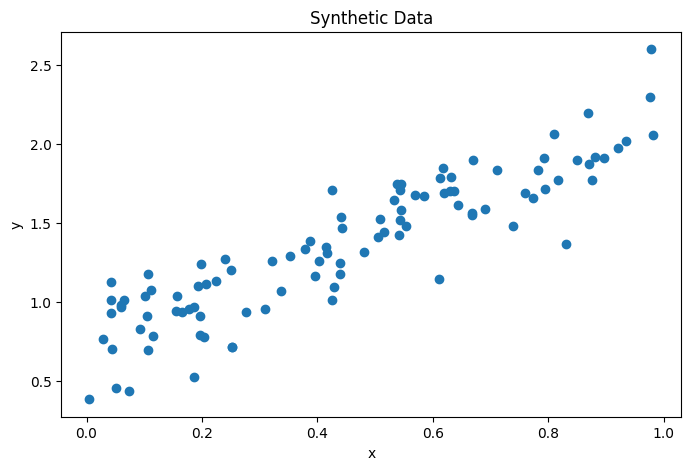

In [59]:
# Plot of the Synthetic Data
plt.figure(figsize=(8,5))
plt.scatter(X, Y)
plt.title("Synthetic Data")
plt.xlabel("x")
plt.ylabel("y")

In [60]:
def h(x, a, b):
    """ Return the Linear Regression Function

    Args:
        x (double/float): input variable for Linear Regression
        a (double/float): weights of features
        b (double/float): bias term

    Returns:
        Equation: Linear Regression Function
    """
    return a * x + b

def loss_function(a, b, X, Y): 
    """ Loss Function for Linear Regression

    Args:
        a (double/float): weights of features
        b (double/float): bias term
        X (list of double/float): input variable for Linear Regression
        Y (list of double/float): target variable

    Returns:
        Equation: Loss Function
    """
    n = len(X)
    return sum((h(x, a, b) - y) ** 2 for x, y in zip(X, Y)) / n 

def gradient_lf(a, b, X, Y): 
    """ Return the Gradient of the Linear Loss Function (MSE)

    Args:
        a (double/float): weights of features
        b (double/float): bias term
        X (list of double/float): input variable for Linear Regression
        Y (list of double/float): target variable

    Returns:
        Gradient: Gradient of the Loss Function wrt the parameters
    """
    n = len(X)
    da = sum(2 * x * (h(x, a, b) - y) for x, y in zip(X, Y)) / n  # Fixed variable names here
    db = sum(2 * (h(x, a, b) - y) for x, y in zip(X, Y)) / n 
    return (da, db)

def gradient_descent(X, Y):  
    """ Run Gradient Descent for Linear Regression

    Args:
        X (list of double/float): input variable for Linear Regression
        Y (list of double/float): target variable
    """
    # Choose Initial parameters
    a_0, b_0 = 0.0, 0.0
    learning_rate = 0.01
    n_steps = 200
    weights = [(a_0, b_0)]

    for _ in range(n_steps):
        a_k, b_k = weights[-1]  # use the most recent weights
        da, db = gradient_lf(a=a_k, b=b_k, X=X, Y=Y) 
        weights.append((a_k - learning_rate * da, b_k - learning_rate * db))

    return weights[-1]


In [61]:
lr_weights = gradient_descent(X, Y)

In [62]:
f"h(x) = {lr_weights[0]} x + {lr_weights[1]}"

'h(x) = 0.7425387405550353 x + 1.0344965540556181'

In [65]:
y_hat = lr_weights[1] + lr_weights[1]*X
y_true = 0.7 + 1.5*X

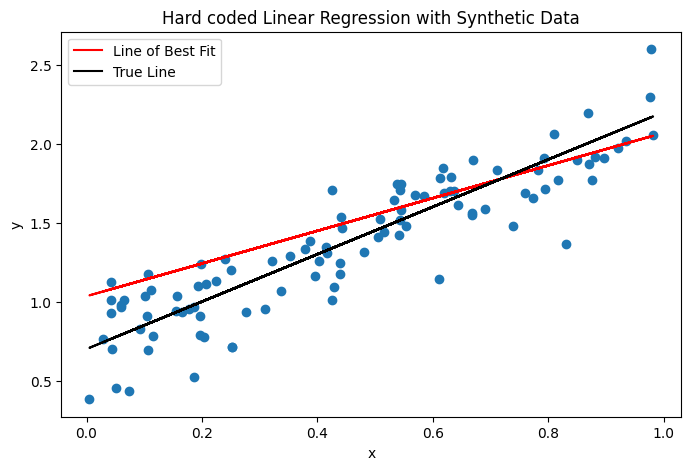

In [66]:
# Plot of the Synthetic Data
plt.figure(figsize=(8,5))
plt.scatter(X, Y)
plt.plot(X, y_hat, color='red', label='Line of Best Fit')
plt.plot(X, y_true, color='black', label='True Line')
plt.title("Hard coded Linear Regression with Synthetic Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend();